In [2]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [5]:
train_5 = x_train[y_train == 5]
test_5 = x_test[y_test == 5]

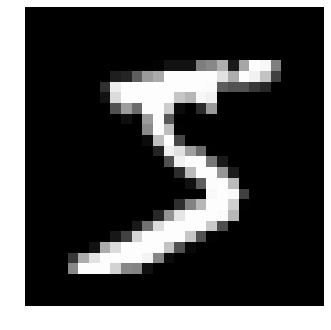

In [6]:
plt.axis("off")
plt.imshow(train_5[0,:,:,0])
plt.gray()
plt.show()

In [7]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)

x = Dense(14*14*16, activation='relu')(x)
encoded = Dense(100, activation='relu')(x)
x = Dense(14*14*16, activation='relu')(encoded)

x = Reshape((14,14,16))(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
checkpointer = ModelCheckpoint(filepath="weights_sign.hdf5", verbose=1, save_best_only=True, save_weights_only=True)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2453 - val_loss: 0.1585

Epoch 00001: val_loss improved from inf to 0.15846, saving model to weights_sign.hdf5
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1412 - val_loss: 0.1253

Epoch 00002: val_loss improved from 0.15846 to 0.12532, saving model to weights_sign.hdf5
Epoch 3/10
44800/60000 [=====================>........] - ETA: 2s - loss: 0.119160000/60000 [==============================] - 9s 154us/step - loss: 0.1171 - val_loss: 0.1104

Epoch 00003: val_loss improved from 0.12532 to 0.11038, saving model to weights_sign.hdf5
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1055 - val_loss: 0.1003

Epoch 00004: val_loss improved from 0.11038 to 0.10031, saving model to weights_sign.hdf5
Epoch 5/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0987 - val_los

In [13]:
encoder = Model(input_img, encoded)
encoder_imgs = encoder.predict(x_test)

In [14]:
import numpy as np
from sklearn.manifold import TSNE
X = encoder_imgs
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(10000, 2)

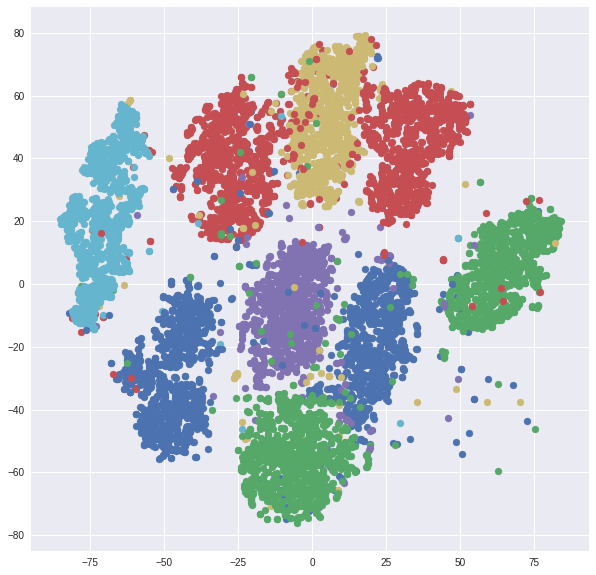

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[y_test==5, 0], X_embedded[y_test==5, 1], label='C1')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==6, 0],  X_embedded[y_test==6, 1], label='C2')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==7, 0], X_embedded[y_test==7, 1], label='C3')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==8, 0], X_embedded[y_test==8, 1], label='C4')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==9, 0], X_embedded[y_test==9, 1], label='C5')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==1, 0], X_embedded[y_test==1, 1], label='C6')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==2, 0], X_embedded[y_test==2, 1], label='C7')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==3, 0], X_embedded[y_test==3, 1], label='C8')#c=y_test[:1000])
plt.scatter(X_embedded[y_test==4, 0], X_embedded[y_test==4, 1], label='C9')#c=y_test[:1000])

plt.show()